In [1]:
print('hi')

hi


In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sb

In [3]:
dt=pd.read_csv('D:\\DataAnalytics\\DataSets\\Cleaned_DS_Jobs.csv')

In [4]:
dt.shape

(660, 27)

In [5]:
print(dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          660 non-null    object 
 1   Salary Estimate    660 non-null    object 
 2   Job Description    660 non-null    object 
 3   Rating             660 non-null    float64
 4   Company Name       660 non-null    object 
 5   Location           660 non-null    object 
 6   Headquarters       660 non-null    object 
 7   Size               660 non-null    object 
 8   Type of ownership  660 non-null    object 
 9   Industry           660 non-null    object 
 10  Sector             660 non-null    object 
 11  Revenue            660 non-null    object 
 12  min_salary         660 non-null    int64  
 13  max_salary         660 non-null    int64  
 14  avg_salary         660 non-null    int64  
 15  job_state          660 non-null    object 
 16  same_state         660 non

In [6]:
dt.describe()

,Rating,min_salary,max_salary,avg_salary,same_state,company_age,python,excel,hadoop,spark,aws,tableau,big_data
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,3.587424,99.296970,148.301515,123.612121,0.407576,29.736364,0.730303,0.440909,0.212121,0.281818,0.260606,0.184848,0.206061
std,1.183540,33.161485,48.264588,39.786698,0.491756,39.763033,0.444139,0.496873,0.409120,0.450226,0.439298,0.388469,0.404781
min,0.000000,31.000000,56.000000,43.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,79.000000,119.000000,103.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.800000,91.000000,133.000000,114.000000,0.000000,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.300000,122.000000,165.000000,136.000000,1.000000,37.250000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,5.000000,212.000000,331.000000,271.000000,1.000000,239.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
dt.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
min_salary           0
max_salary           0
avg_salary           0
job_state            0
same_state           0
company_age          0
python               0
excel                0
hadoop               0
spark                0
aws                  0
tableau              0
big_data             0
job_simp             0
seniority            0
dtype: int64

In [8]:
#Already Cleaned in EXCEl

In [11]:
import matplotlib.pyplot as plt

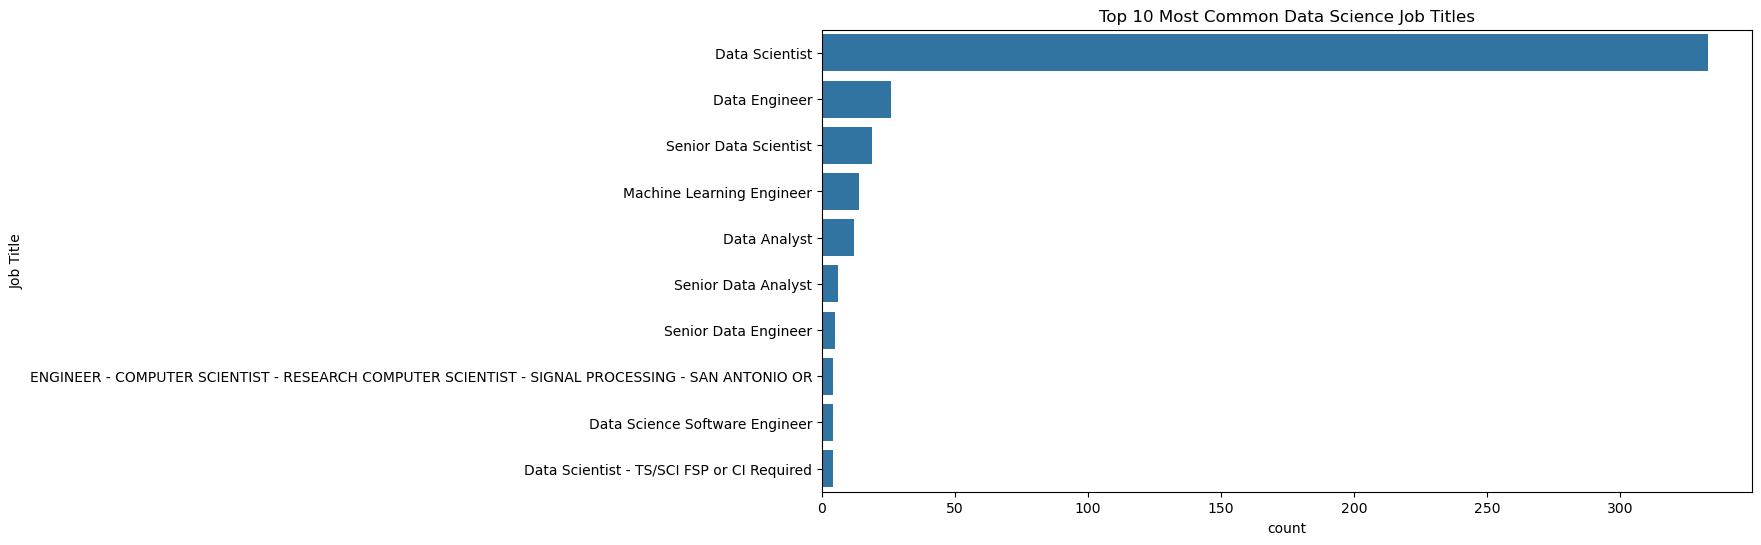

In [12]:
plt.figure(figsize=(12, 6))
sb.countplot(y='Job Title', data=dt, order=dt['Job Title'].value_counts().index[:10])
plt.title('Top 10 Most Common Data Science Job Titles')
plt.show()

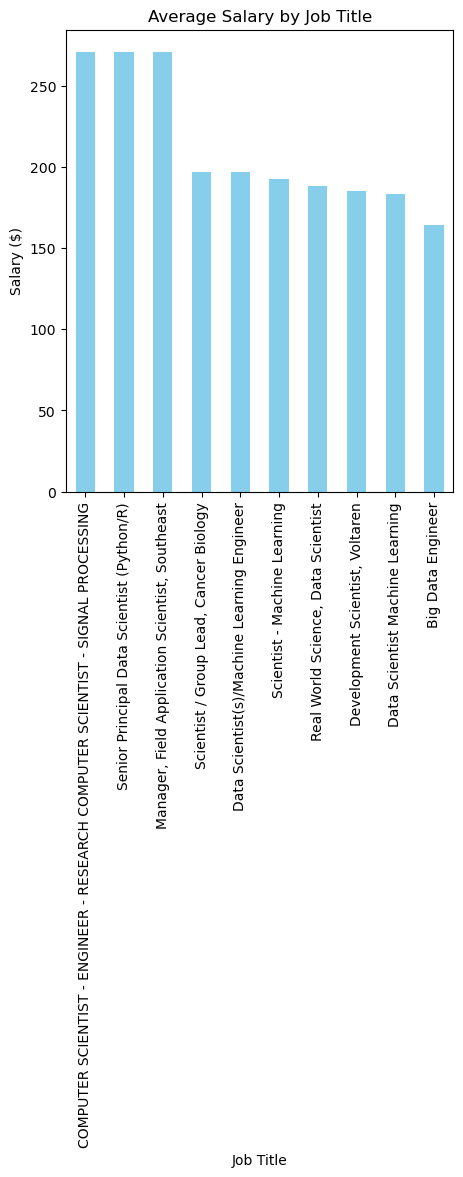

In [21]:
avg_salary = dt.groupby('Job Title')['avg_salary'].mean().sort_values(ascending=False)[:10]
avg_salary.plot(kind='bar', figsize=(5, 6), color='skyblue')
plt.title('Average Salary by Job Title')
plt.ylabel('Salary ($)')
plt.show()


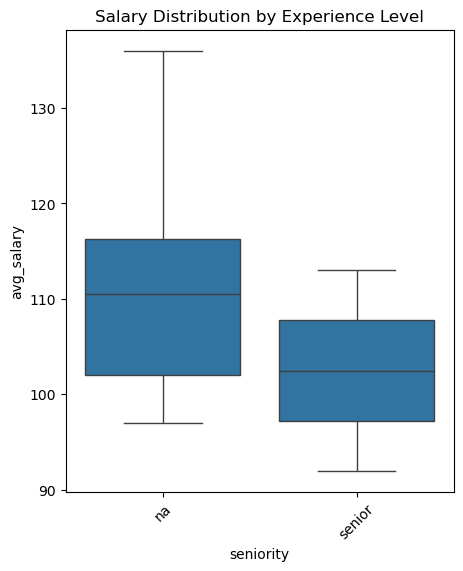

In [29]:
plt.figure(figsize=(5, 6))
sb.boxplot(x='seniority', y='avg_salary', data=dt.sample(10))
plt.title('Salary Distribution by Experience Level')
plt.xticks(rotation=45)
plt.show()

In [32]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [33]:
from wordcloud import WordCloud

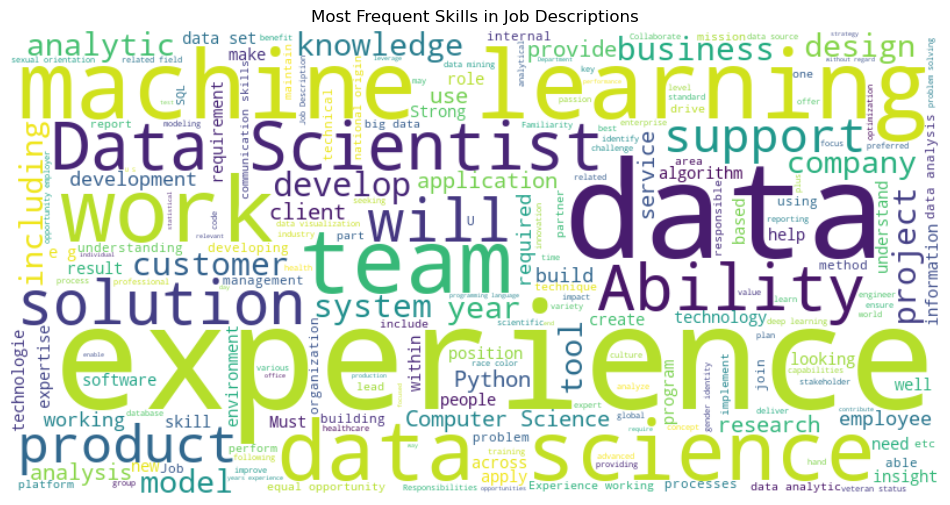

In [34]:


# Combine all job descriptions
text = " ".join(desc for desc in dt['Job Description'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Skills in Job Descriptions')
plt.show()

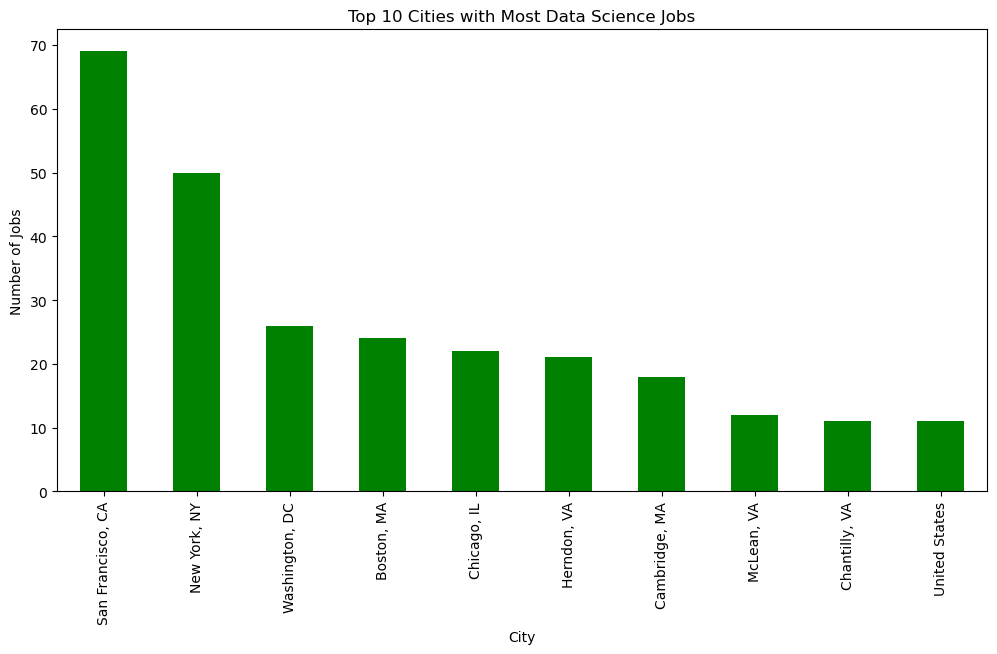

In [35]:
top_locations = dt['Location'].value_counts().head(10)
top_locations.plot(kind='bar', figsize=(12, 6), color='green')
plt.title('Top 10 Cities with Most Data Science Jobs')
plt.xlabel('City')
plt.ylabel('Number of Jobs')
plt.show()

In [38]:
dt['Job_Type'] = dt.apply(lambda row: 'Onsite' if row['Location'] == row['Headquarters'] else 'Remote', axis=1)


In [41]:
job_counts = dt['Job_Type'].value_counts()
job_counts

Job_Type
Remote    391
Onsite    269
Name: count, dtype: int64

In [45]:
job_percentages = dt['Job_Type'].value_counts(normalize=True) * 100

print("\nPercentages:\n", job_percentages)


Percentages:
 Job_Type
Remote    59.242424
Onsite    40.757576
Name: proportion, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4388\1755843676.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=job_counts.index, y=job_counts.values, palette='viridis')


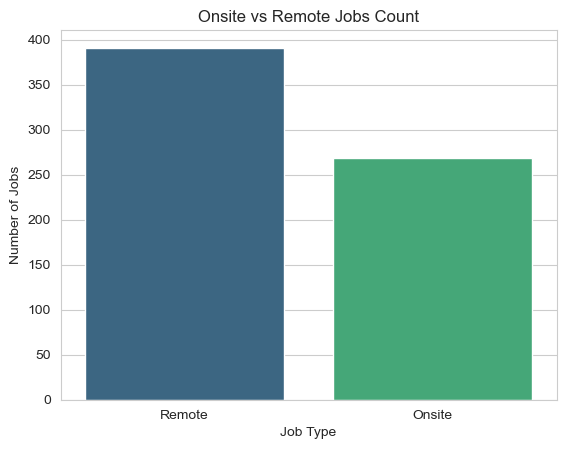

In [46]:
sb.set_style("whitegrid")
sb.barplot(x=job_counts.index, y=job_counts.values, palette='viridis')
plt.title("Onsite vs Remote Jobs Count")
plt.ylabel("Number of Jobs")
plt.xlabel("Job Type")
plt.show()

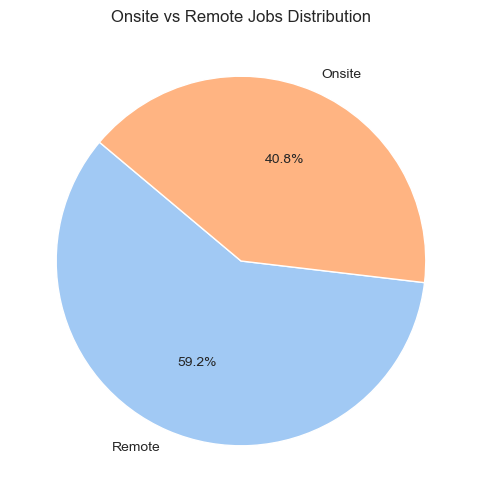

In [48]:
plt.figure(figsize=(6,6))
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', startangle=140, colors=sb.color_palette('pastel'))
plt.title("Onsite vs Remote Jobs Distribution")
plt.show()

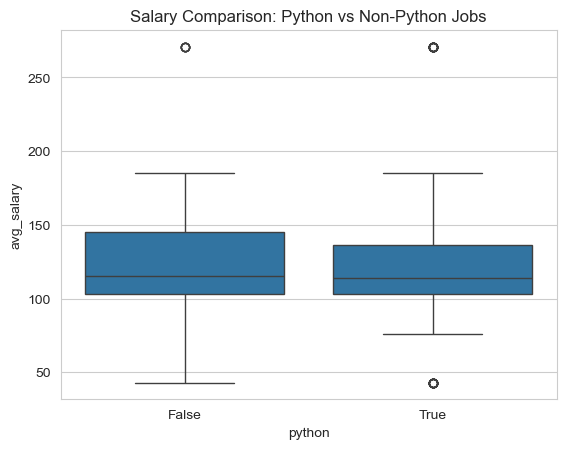

In [51]:
dt['python'] = dt['Job Description'].str.contains('python', case=False)
sb.boxplot(x='python', y='avg_salary', data=dt)
plt.title('Salary Comparison: Python vs Non-Python Jobs')
plt.show()